In [1]:
import numpy as np
import tensorflow as tf
import os
import zipfile
import shutil
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import random
from shutil import copyfile
# import seaborn as sns

In [2]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
id_file='1dRk65cqN6KqiMHLd0wRNSX_JWQkZ35N1'

In [4]:
downloaded = drive.CreateFile({'id':id_file})  #drive from PyDrive
downloaded.GetContentFile('cassava-disease.zip')  

In [5]:
local_zip='./cassava-disease.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./cassava_disease/')
zip_ref.close()

# Exploratory Data Analysyst

In [6]:
list_directory=os.listdir('./cassava_disease/train')
print(list_directory)

['cbsd', 'cmd', 'healthy', 'cgm', 'cbb']


In [7]:
image_directory='./cassava_disease/train'

for  item in list_directory:
  class_dir = os.path.join(image_directory,item)
  print(item ," : ",len(os.listdir(class_dir)),"images")

cbsd  :  1443 images
cmd  :  2658 images
healthy  :  316 images
cgm  :  773 images
cbb  :  466 images


cbsd


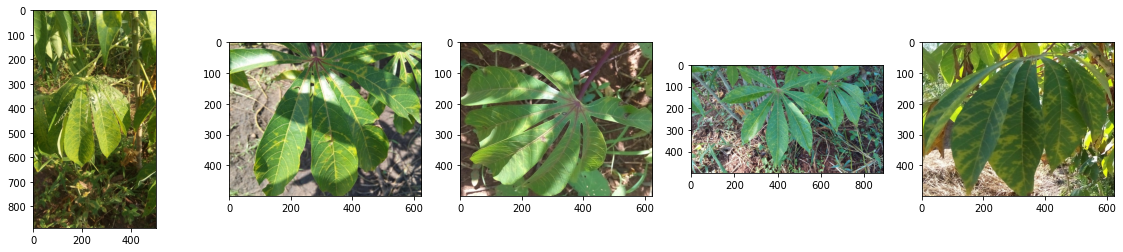

cmd


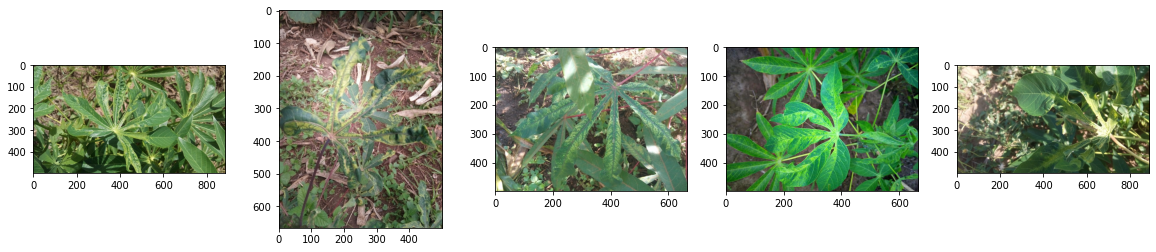

healthy


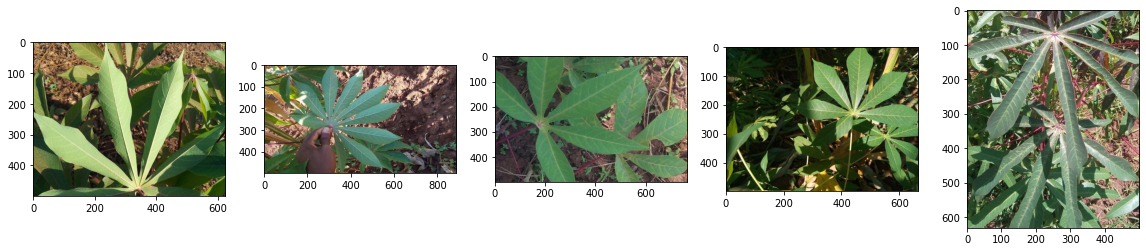

cgm


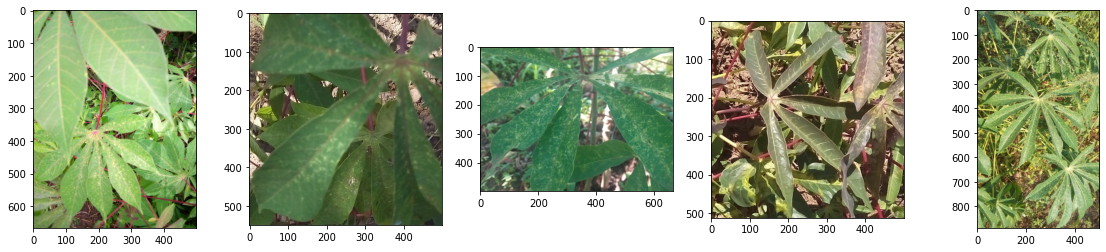

cbb


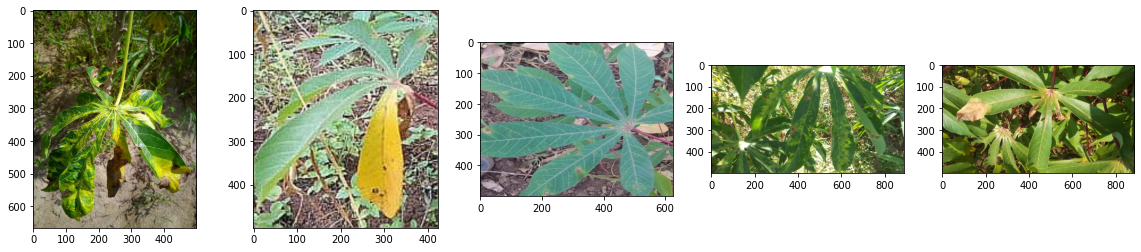

In [8]:
#checking image on directory
for  images in list_directory:
  print(images)
  class_dir = os.path.join(image_directory,images)
  class_images = os.listdir(class_dir)
  plt.figure(figsize=(20, 4))
  for i, img_path in enumerate(class_images[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(class_dir, img_path))
    plt.imshow(img)
  plt.show()

In [9]:
#delete if folder exist
root_dir='./disease_casava_leaf'
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

#create training and testing directory
def create_train_and_test_dir(root_path):
    
    train='training'
    tes='testing'
  #CREATE SUB OF ROOT DIRECTORY
    path_train=os.path.join(root_dir,train)
    path_test=os.path.join(root_dir,tes)
    train_dir=os.makedirs(path_train)
    test_dir=os.makedirs(path_test)
    base_train='./disease_casava_leaf/training/'
    base_test='./disease_casava_leaf/testing/' 
    list_disease=['cbb','cbsd','cgm','cmd','healthy']
    for i in(list_disease):
        path_training=os.path.join(base_train,i)
        path_test=os.path.join(base_test,i)
        make_dir_train=os.makedirs(path_training)
        make_dr_test=os.makedirs(path_test)
        
try:
  create_train_and_test_dir(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")
    

In [10]:
#checking folder in test and train directory
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

./disease_casava_leaf/training
./disease_casava_leaf/testing
./disease_casava_leaf/training/cbsd
./disease_casava_leaf/training/cmd
./disease_casava_leaf/training/healthy
./disease_casava_leaf/training/cgm
./disease_casava_leaf/training/cbb
./disease_casava_leaf/testing/cbsd
./disease_casava_leaf/testing/cmd
./disease_casava_leaf/testing/healthy
./disease_casava_leaf/testing/cgm
./disease_casava_leaf/testing/cbb


In [11]:
#splitting and copyng data for testing and training
def data_split(source_data,training_data,testing_data,split_size):
    files=[]
    for filename in os.listdir(source_data):
        file= source_data + filename
        if os.path.getsize(file)>0:
          files.append(filename)
        else:
          print(filename + ' is zero length, so ignoring.')

    training_length=int(len(files)*split_size)
     
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[:testing_length]
    for filename in training_set:
        this_file = source_data + filename
        destination = training_data + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = source_data + filename
        destination = testing_data + filename
        copyfile(this_file, destination)

    

In [12]:
# folder source image 
cbb_image_source='./cassava_disease/train/cbb/'
cbsd_image_source='./cassava_disease/train/cbsd/'
cgm_image_source='./cassava_disease/train/cgm/'
cmd_image_source='./cassava_disease/train/cmd/'
healthy_image_source='./cassava_disease/train/healthy/'

#train_directory 
train_directory='./disease_casava_leaf/training/'
testing_directgory='./disease_casava_leaf/testing/'

#directory to copyng files for train directory
cbb_train_dir='./disease_casava_leaf/training/cbb/'
cbsd_train_dir='./disease_casava_leaf/training/cbsd/'
cgm_train_dir='./disease_casava_leaf/training/cgm/'
cmd_train_dir='./disease_casava_leaf/training/cmd/'
healthy_train_dir='./disease_casava_leaf/training/healthy/'

#directory to copyng files in tro used for testing
cbb_test_dir='./disease_casava_leaf/testing/cbb/'
cbsd_test_dir='./disease_casava_leaf/testing/cbsd/'
cgm_test_dir='./disease_casava_leaf/testing/cgm/'
cmd_test_dir='./disease_casava_leaf/testing/cmd/'
healthy_test_dir='./disease_casava_leaf/testing/healthy/'

#remove files if directory is not empty
if len(os.listdir(cbb_train_dir)) > 0:
  for file in os.scandir(cbb_train_dir):
    os.remove(file.path)
if len(os.listdir(cbsd_train_dir)) > 0:
  for file in os.scandir(cbsd_train_dir):
    os.remove(file.path)
if len(os.listdir(cgm_train_dir)) > 0:
  for file in os.scandir(cgm_train_dir):
    os.remove(file.path)
if len(os.listdir(cmd_train_dir)) > 0:
  for file in os.scandir(cmd_train_dir):
    os.remove(file.path)
if len(os.listdir(healthy_train_dir)) > 0:
  for file in os.scandir(healthy_train_dir):
    os.remove(file.path)
if len(os.listdir(cbb_test_dir)) > 0:
  for file in os.scandir(cbb_test_dir):
    os.remove(file.path)
if len(os.listdir(cbsd_test_dir)) > 0:
  for file in os.scandir(cbsd_test_dir):
    os.remove(file.path)
if len(os.listdir(cgm_test_dir)) > 0:
  for file in os.scandir(cgm_test_dir):
    os.remove(file.path)
if len(os.listdir(cmd_test_dir)) > 0:
  for file in os.scandir(cmd_test_dir):
    os.remove(file.path)
if len(os.listdir(healthy_test_dir)) > 0:
  for file in os.scandir(healthy_test_dir):
    os.remove(file.path)

data_split_size=.65


data_split(cbb_image_source,cbb_train_dir,cbb_test_dir,data_split_size)
data_split(cbsd_image_source,cbsd_train_dir,cbsd_test_dir,data_split_size)
data_split(cgm_image_source,cgm_train_dir,cgm_test_dir,data_split_size)
data_split(cmd_image_source,cmd_train_dir,cmd_test_dir,data_split_size)
data_split(healthy_image_source,healthy_train_dir,healthy_test_dir,data_split_size)











In [13]:
#looking for image properties on training directory
training_directory='./disease_casava_leaf/training/'
listdir_train_image=os.listdir(training_directory)
total_train_images=0
for item in listdir_train_image:
    class_dir = os.path.join(training_directory,item)
    sum_total=len(os.listdir(class_dir))
    total_train_images=total_train_images+sum_total
    print("Train",item ," : ",len(os.listdir(class_dir)),"images")
print('total train image: ',total_train_images,"Images")

    
    

Train cbsd  :  937 images
Train cmd  :  1727 images
Train healthy  :  205 images
Train cgm  :  502 images
Train cbb  :  302 images
total train image:  3673 Images


In [14]:
#looking for image properties on testing directory
testing_directory='./disease_casava_leaf/testing/'
listdir_test_images=os.listdir(testing_directory)
total_test_images=0
for item in listdir_test_images:
    class_dir=os.path.join(testing_directory,item)
    sum_total=len(os.listdir(class_dir))
    total_test_images=total_test_images+sum_total
    print("Test",item," : ",len(os.listdir(class_dir)),"images")
print('total test image: ',total_test_images,"Images")

    

Test cbsd  :  506 images
Test cmd  :  931 images
Test healthy  :  111 images
Test cgm  :  271 images
Test cbb  :  164 images
total test image:  1983 Images


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Activation, Flatten, MaxPool2D

# Image **Preprocessing**

In [16]:
image_size=96
BATCH_SIZE = 32
train_datagen = ImageDataGenerator(
                               rotation_range=8,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.01,
                               zoom_range=[0.9, 1.25],
                               horizontal_flip=True,
                               vertical_flip=False,
                              channel_shift_range = 0.1,
                              fill_mode='nearest',
                              #brightness_range=[0.5, 1.5],
                              #  validation_split=0.25,
                               rescale=1./255)


In [17]:

train_generator = train_datagen.flow_from_directory(
    training_directory,
    shuffle=True,
    seed=42,
    target_size =(image_size,image_size),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical',
    # subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    testing_directory,
    target_size = (image_size,image_size),
    shuffle=True,
    batch_size = BATCH_SIZE,
    class_mode = 'categorical',
    # subset='validation'
)


Found 3673 images belonging to 5 classes.
Found 1983 images belonging to 5 classes.


In [51]:
label_types = []
for category in train_generator.class_indices:
  label_types.append(category)
label_types

['cbb', 'cbsd', 'cgm', 'cmd', 'healthy']

In [18]:
base_model = tf.keras.applications.MobileNetV2(include_top=False,weights='imagenet',input_shape=(image_size,image_size,3))
base_model.trainable = False

9420800/9406464 [==============================] - 0s 0us/step


# Model 1

In [22]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(64, (3,3),padding='same',activation='relu', input_shape=(image_size,image_size, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),  
    tf.keras.layers.Conv2D(64, (3,3),padding='same', activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
      
    
    tf.keras.layers.Flatten(), 
    
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(5, activation='softmax')  
])

In [23]:

model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001,decay=1e-6),
              # loss=tf.keras.losses.CategoricalCrossentropy(),
              #loss=tfa.losses.SigmoidFocalCrossEntropy(),
              loss='mean_squared_error',
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [24]:
# fitting model
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size
# STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
history=model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=validation_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=30
                   )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Epoch 1/30
114/114 [==============================] - 60s 424ms/step - loss: 0.1392 - accuracy: 0.4669 - val_loss: 0.1286 - val_accuracy: 0.5241
Epoch 2/30
114/114 [==============================] - 53s 468ms/step - loss: 0.1283 - accuracy: 0.5284 - val_loss: 0.1180 - val_accuracy: 0.5758
Epoch 3/30
114/114 [==============================] - 48s 420ms/step - loss: 0.1218 - accuracy: 0.5584 - val_loss: 0.1157 - val_accuracy: 0.6019
Epoch 4/30
114/114 [==============================] - 48s 419ms/step - loss: 0.1190 - accuracy: 0.5661 - val_loss: 0.1109 - val_accuracy: 0.6066
Epoch 5/30
114/114 [==============================] - 49s 427ms/step - loss: 0.1158 - accuracy: 0.5806 - val_loss: 0.1241 - val_accuracy: 0.5645
Epoch 6/30
114/114 [==============================] - 52s 454ms/step - loss: 0.1144 - accuracy: 0.5856 - val_loss: 0.1139 - val_accuracy: 0.5820
Epoch 7/30
114/114 [==============================] - 48s 418ms/step - loss: 0.1126 - accuracy: 0.5965 - val_loss: 0.1200 - val_ac

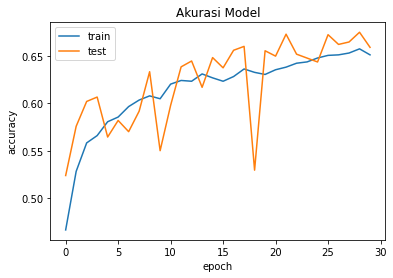

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Saving train-cbb-1.jpg to train-cbb-1.jpg
Cassava Green Mottle


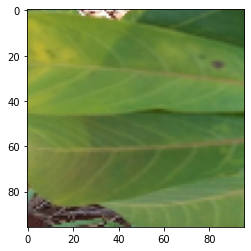

In [27]:
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for path in uploaded.keys():
  img = image.load_img(path, target_size=(image_size,image_size))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
  classes = model.predict(images, batch_size=70) # the value is not always 1 and 0 because of probabilities
  predicted_class_indices=np.argmax(classes) # use to check prediction that have higher probabilities

if predicted_class_indices == 0:
    print('Cassava Bacterial Blight')
elif predicted_class_indices == 1:
  print('Cassava brown streak virus disease')
elif predicted_class_indices == 2:
  print('Cassava Green Mottle')
elif predicted_class_indices == 3:
  print('cassava mosaic disease ')
elif predicted_class_indices == 4:
  print('Healthy')
else:
  print('')

In [32]:
scores = model.evaluate(train_generator, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 67.36%


# MODEL2

In [ ]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(image_size, image_size, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  
    tf.keras.layers.MaxPooling2D(2,2),
    

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='sigmoid')
])

In [ ]:
model2.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001,decay=1e-6),
              loss='mean_squared_error',
              #loss=tfa.losses.SigmoidFocalCrossEntropy(),
              metrics=['accuracy'])

In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size
# STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
history=model2.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=validation_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=30
                   )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30


InvalidArgumentError: ignored

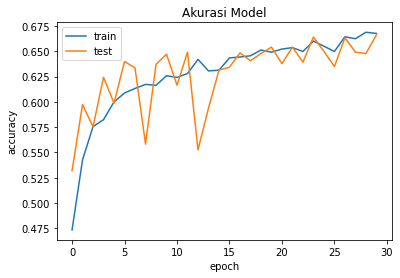

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for path in uploaded.keys():
  img = image.load_img(path, target_size=(IMAGE_SHAPE,IMAGE_SHAPE))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
  classes = model2.predict(images, batch_size=70) # the value is not always 1 and 0 because of probabilities
  predicted_class_indices=np.argmax(classes) # use to check prediction that have higher probabilities

if predicted_class_indices == 0:
    print('Cassava Bacterial Blight')
elif predicted_class_indices == 1:
  print('Cassava brown streak virus disease')
elif predicted_class_indices == 2:
  print('Cassava Green Mottle')
elif predicted_class_indices == 3:
  print('cassava mosaic disease ')
elif predicted_class_indices == 4:
  print('Healthy')
else:
  print('')

NameError: ignored

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              #loss=tfa.losses.SigmoidFocalCrossEntropy(),
              metrics=['accuracy'])

In [ ]:
model.fit(train_datagen,epochs=30,validation_data=valid_datagen,callbacks = [reduce_lr,early_stop])

Epoch 1/30
65/65 [==============================] - 121s 2s/step - loss: 1.1222 - accuracy: 0.5997 - val_loss: 1.0866 - val_accuracy: 0.5988 - lr: 0.0010
Epoch 2/30
65/65 [==============================] - 113s 2s/step - loss: 1.0784 - accuracy: 0.6130 - val_loss: 1.0525 - val_accuracy: 0.6103 - lr: 0.0010
Epoch 3/30
65/65 [==============================] - 113s 2s/step - loss: 1.0477 - accuracy: 0.6258 - val_loss: 1.1026 - val_accuracy: 0.6050 - lr: 0.0010
Epoch 4/30
65/65 [==============================] - 113s 2s/step - loss: 1.0210 - accuracy: 0.6313 - val_loss: 1.0709 - val_accuracy: 0.6076 - lr: 0.0010
Epoch 5/30
65/65 [==============================] - 112s 2s/step - loss: 1.0163 - accuracy: 0.6364 - val_loss: 1.0143 - val_accuracy: 0.6315 - lr: 0.0010
Epoch 6/30
65/65 [==============================] - 112s 2s/step - loss: 1.0033 - accuracy: 0.6364 - val_loss: 1.0691 - val_accuracy: 0.6138 - lr: 0.0010
Epoch 7/30
65/65 [==============================] - 115s 2s/step - loss: 0.9

KeyboardInterrupt: ignored

# **Model 4**

9420800/9406464 [==============================] - 0s 0us/step


In [33]:
base_model.trainable = False

In [35]:
try:
    with tf.device('/device:GPU:0'):
        inputs = tf.keras.layers.Input(shape=(image_size,image_size,3))
        x = base_model(inputs)
        x = tf.keras.layers.GaussianNoise(0.2)(x)
        x = tf.keras.layers.GlobalAveragePooling2D()(x)
        outputs = tf.keras.layers.Dense(5,activation="softmax")(x)

        model4 = tf.keras.Model(inputs=[inputs],outputs=[outputs])

        model4.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
                      loss='categorical_crossentropy',
                      #loss=tfa.losses.SigmoidFocalCrossEntropy(),
                      metrics=['accuracy'])

        history=model4.fit(train_generator,epochs=30,validation_data=validation_generator,)
except RuntimeError as e:
    print(e)   

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/30
115/115 [==============================] - 51s 425ms/step - loss: 1.2475 - accuracy: 0.5396 - val_loss: 1.0434 - val_accuracy: 0.6006
Epoch 2/30
115/115 [==============================] - 47s 413ms/step - loss: 1.0068 - accuracy: 0.6251 - val_loss: 0.9430 - val_accuracy: 0.6455
Epoch 3/30
115/115 [==============================] - 47s 413ms/step - loss: 0.9280 - accuracy: 0.6501 - val_loss: 0.8690 - val_accuracy: 0.6742
Epoch 4/30
115/115 [==============================] - 48s 414ms/step - loss: 0.8881 - accuracy: 0.6597 - val_loss: 0.8621 - val_accuracy: 0.6878
Epoch 5/30
115/115 [==============================] - 48s 415ms/step - loss: 0.8790 - accuracy: 0.6665 - val_loss: 0.8414 - val_accuracy: 0.6889
Epoch 6/30
115/115 [==============================] - 47s 413ms/step - loss: 0.8635 - accuracy: 0.6785 - val_loss: 0.8227 - val_accuracy: 0.6984
Epoch 7/30
115/115 [==============================] - 47s 412ms/step - loss: 0.8329 - accuracy: 0.6896 - val_loss: 0.7942 - val_ac

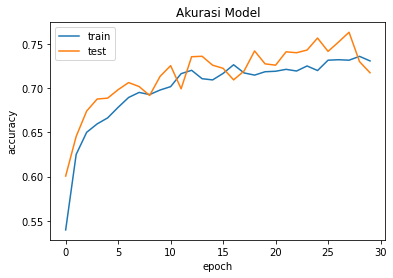

In [36]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper left')
plt.show()

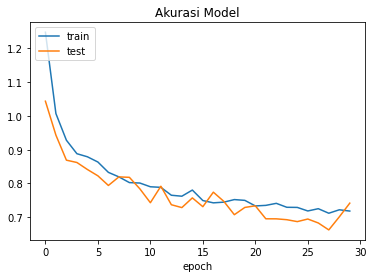

In [37]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Akurasi Model')
plt.ylabel('')
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Saving train-cbsd-21.jpg to train-cbsd-21.jpg
Cassava brown streak virus disease


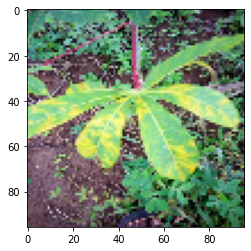

In [45]:
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for path in uploaded.keys():
  img = image.load_img(path, target_size=(96,96))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
  classes = model4.predict(images, batch_size=32) # the value is not always 1 and 0 because of probabilities
  predicted_class_indices=np.argmax(classes) # use to check prediction that have higher probabilities

if predicted_class_indices == 0:
    print('Cassava Bacterial Blight')
elif predicted_class_indices == 1:
  print('Cassava brown streak virus disease')
elif predicted_class_indices == 2:
  print('Cassava Green Mottle')
elif predicted_class_indices == 3:
  print('cassava mosaic disease ')
elif predicted_class_indices == 4:
  print('Healthy')
else:
  print('')

In [48]:
classes

array([[3.7829092e-04, 9.9813026e-01, 1.6160205e-04, 1.3294796e-03,
        3.6592431e-07]], dtype=float32)

In [47]:
scores = model4.evaluate(train_generator, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 73.54%


# Save Model

In [53]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model4.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up

INFO:tensorflow:Assets written to: /tmp/1/assets


INFO:tensorflow:Assets written to: /tmp/1/assets



export_path = /tmp/1
total 3584
drwxr-xr-x 2 root root    4096 May 13 15:09 assets
-rw-r--r-- 1 root root  528099 May 13 15:09 keras_metadata.pb
-rw-r--r-- 1 root root 3129988 May 13 15:09 saved_model.pb
drwxr-xr-x 2 root root    4096 May 13 15:09 variables


In [56]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'cassava_disease_v1.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('cassava_disease_v1.txt', 'w') as f:
    f.write('\n'.join(label_types))

## Model 5

In [ ]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.utils.vis_utils import model_to_dot


import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

In [ ]:
input_shape = ((300, 300, 3))
X_input = Input(input_shape)
    
# Zero-Padding: pads the border of X_input with zeroes
X = ZeroPadding2D((3, 3))(X_input)

# CONV -> BN -> RELU Block applied to X
X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
X = BatchNormalization(axis = 3, name = 'bn0')(X)
X = Activation('relu')(X)

# MAXPOOL
X = AveragePooling2D((2, 2), name='avg_pool0')(X)

# CONV -> BN -> RELU Block applied to X
X = Conv2D(32, (5, 5), strides = (1, 1), name = 'conv1')(X)
X = BatchNormalization(axis = 3, name = 'bn1')(X)
X = Activation('relu')(X)

# MAXPOOL
X = AveragePooling2D((2, 2), name='avg_pool1')(X)

# CONV -> BN -> RELU Block applied to X
X = Conv2D(32, (3, 3), strides = (1, 1), name = 'conv2')(X)
X = BatchNormalization(axis = 3, name = 'bn2')(X)
X = Activation('relu')(X)

# MAXPOOL
X = AveragePooling2D((2, 2), name='avg_pool2')(X)

# FLATTEN X (means convert it to a vector) + FULLYCONNECTED
X = Flatten()(X)
X = Dense(1024, activation="relu")(X)
X = Dropout(0.5)(X)
X = Dense(5, activation='softmax', name='fc')(X)

# Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
model3 = Model(inputs = X_input, outputs = X, name='satellite')

In [ ]:
model3.compile(optimizer="sgd", loss="mean_squared_error", metrics=["accuracy"])

In [ ]:
model3.fit(train_generator, validation_data=validation_generator, epochs=50, batch_size=32)

Epoch 1/50
133/133 [==============================] - 146s 1s/step - loss: 0.1467 - accuracy: 0.4607 - val_loss: 0.1602 - val_accuracy: 0.2550
Epoch 2/50
133/133 [==============================] - 140s 1s/step - loss: 0.1292 - accuracy: 0.5290 - val_loss: 0.1866 - val_accuracy: 0.2550
Epoch 3/50
133/133 [==============================] - 141s 1s/step - loss: 0.1216 - accuracy: 0.5551 - val_loss: 0.1572 - val_accuracy: 0.3336
Epoch 4/50
133/133 [==============================] - 139s 1s/step - loss: 0.1177 - accuracy: 0.5773 - val_loss: 0.1208 - val_accuracy: 0.5559
Epoch 5/50
133/133 [==============================] - 139s 1s/step - loss: 0.1146 - accuracy: 0.5860 - val_loss: 0.1131 - val_accuracy: 0.5899
Epoch 6/50
133/133 [==============================] - 141s 1s/step - loss: 0.1144 - accuracy: 0.5919 - val_loss: 0.1472 - val_accuracy: 0.5255
Epoch 7/50
133/133 [==============================] - 139s 1s/step - loss: 0.1122 - accuracy: 0.5985 - val_loss: 0.1087 - val_accuracy: 0.6126